In [21]:
# Gerekli Kütüphanelerin Yüklenmesi Yapılıyor
import numpy as np 
import pandas as pd
import missingno as msno
import scipy.stats
from ipywidgets import Image
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz
import mglearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plot
import seaborn as sea
import sklearn.metrics as mt
import os
os.environ['PATH'].split(';')
import pandas as pan
import scikitplot.metrics as splt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib as mp
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn import tree
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from itertools import combinations
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, plot_confusion_matrix
from collections import defaultdict
import warnings
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

*csv dosyamızı okuyoruz ve df değişkenine atıyoruz.

Veri setine "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction" den bilgisayarıma indirdim ve klasörümün içerisinde mevcut.

In [22]:
data=pd.read_csv("Desktop/DERSLER/Veri_Bilimi/Heart_disease_cleveland_new.csv") 
df=pd.DataFrame(data)
df_copy=df.copy() 

1. Ön işleme-Preprocessing (Veri üzerinde ön işleme yapınız.) 
2. Varsa gereksiz kolonların kaldırılması, boş değerlerin doldurulması vs, 
3. Kategorik Verilerin Sayısallaştırılması 
4. Veri üzerinde gerekli ise normalizasyon vb. işlemler. 
(Bu aşama üzerinde çalıştığınız veriye göre değişebilir.)

Veri setinin daha iyi anlaşılması için bu kısımda sütun adlarını değiştireceğim. (Orjinal verim df değişkeninde ben bir kopyasını oluşturarak işlemlerime devam etmiştim. )

In [23]:
df_copy.rename(columns = { "age":"yasi",
                    "sex":"cinsiyet",
                    "cp":"gogusagrisituru",
                    "trestbps":"istirahatkanbasinci",
                    "chol":"kolestoral",
                    "fbs":"aclikkansekeri",
                    "restecg":"ekg",
                    "thalach":"maxkalphizi",
                    "exang":"egzersizebaglianjin",
                    "oldpeak":"egzersizebagliSTdepresyonu",
                    "slope":"STsegmentininegimi",
                    "ca":"floroskopi",
                    "thal":"defekttip",
                    "target":"sonuc"}, inplace = True)

In [24]:
df_copy.head()

,yasi,cinsiyet,gogusagrisituru,istirahatkanbasinci,kolestoral,aclikkansekeri,ekg,maxkalphizi,egzersizebaglianjin,egzersizebagliSTdepresyonu,STsegmentininegimi,floroskopi,defekttip,sonuc
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


Veri seti 303 kişi verisinden oluşmaktadır. Veri kümesinde aşağıda açıklanan 14 sütun vardır.

"age":"yasi",
"sex":"cinsiyet",
"cp":"gogusagrisituru",
"trestbps":"istirahatkanbasinci",
"chol":"kolestoral",
"fbs":"aclikkansekeri",
"restecg":"ekg",
"thalach":"maxkalphizi",
"exang":"egzersizebaglianjin",
"oldpeak":"egzersizebagliSTdepresyonu",
"slope":"STsegmentininegimi",
"ca":"floroskopi",
"thal":"defekttip",
"target":"sonuc"

1. Yasi : Kişinin yaşını gösterir.
2. cinsiyet : 1 = erkek 0 = kadın
3. gogusagrisituru : kişinin yaşadığı göğüs ağrısının tipini aşağıdaki formatı kullanarak gösterir
    1 = tipik anjina
    2 = atipik angina
    3 = anjinal olmayan ağrı
    4 = asimptotik

4. istirahatkanbasinci : Bir kişinin dinlenme kan basıncı değerini mmHg (birim) cinsinden gösterir.

5. kolestoral : serum kolesterolünü mg/dl (birim) cinsinden gösterir

6. aclikkansekeri : Bireyin açlık kan şekeri değerini 120mg/dl ile karşılaştırır. 
    Açlık kan şekeri > 120mg/dl ise : 1 (doğru) 
    yoksa : 0 (yanlış)

7. ekg : istirahat elektrokardiyografik sonuçlarını gösterir
    0 = normal
    1 = ST-T dalga anormalliği var
    2 = sol ventrikül hipertrofisi

8. maxkalphizi(Ulaşılan maksimum kalp atış hızı) : Bir kişinin ulaştığı maksimum alp atış hızını gösterir.

9. egzersizebaglianjin(Egzersiz kaynaklı anjina) : 
    1 = evet 
    0 = hayır
 
10. egzersizebagliSTdepresyonu(Dinlenmeye göre egzersizle indüklenen ST depresyonu) : tamsayı veya değişken olan değeri gösterir.

11. STsegmentininegimi (Tepe egzersizi ST segmenti) :
    0 = yukarı eğimli
    1 = düz
    2 = aşağı eğimli

12. floroskopi(Florosopi ile renklendirilen ana damarların sayısı (0–3) : değeri tamsayı veya kayan nokta olarak gösterir.

13. defekttip : talasemiyi gösterir :
    2 = normal
    1 = sabit kusur
    3 = geri dönüşümlü kusur

14. target: Kalp hastalığı teşhisi : Kişinin kalp hastalığı olup olmadığını gösterir :
    0 = Kalp Hastası Değil
    1 = Klap Hastası

# Öznitelikler ile İlgili Ek Bilgiler

Gerçek veri setinde 76 özellik bulunmakta ama veri setini aldığımız yerde 14 öznitelikli bir veri setiydi, araştırmalarım sonucunda bu 14 özntelik hastalığı belirlemede yeterli olacaktır.

1.Yaş : Yaş, kardiyovasküler veya kalp hastalıklarının gelişmesinde en önemli risk faktörüdür.

2.Cinsiyet : Erkekler, menopoz öncesi kadınlara göre daha fazla kalp hastalığı riski altındadır. 

3.Angina (Göğüs Ağrısı) : Angina, kalp kasınız yeterince oksijen açısından zengin kan alamadığında ortaya çıkan göğüs ağrısı veya rahatsızlığıdır. Göğsünüzde baskı veya sıkışma hissi olabilir. 

4.Dinlenme Kan Basıncı : Zamanla, yüksek tansiyon kalbinizi besleyen atardamarlara zarar verebilir. Obezite, yüksek kolesterol veya diyabet gibi diğer durumlarla ortaya çıkan yüksek tansiyon, riskinizi daha da artırır.

5.Serum Kolesterolü : Yüksek düzeyde düşük yoğunluklu lipoprotein (LDL) kolesterol ("kötü" kolesterol) büyük olasılıkla arterleri daraltır. Diyetinizle ilgili bir tür kan yağı olan yüksek düzeyde trigliseritler de kalp krizi riskinizi artırır. 

6.Açlık Kan Şekeri : Pankreasınız tarafından salgılanan bir hormonun (insülin) yeterince üretilmemesi veya insüline uygun şekilde yanıt verilmemesi, vücudunuzun kan şekeri düzeylerinin yükselmesine ve kalp krizi riskinizin artmasına neden olur.

7.İstirahat EKG'si : Kardiyovasküler hastalık riski düşük olan kişiler için USPSTF, istirahat veya egzersiz EKG'si ile taramanın potansiyel zararlarının potansiyel faydalara eşit veya daha fazla olduğu sonucuna varmıştır.

8.Ulaşılan maksimum kalp atış hızı : Kalp atış hızının hızlanmasıyla ilişkili kardiyovasküler riskteki artış, yüksek tansiyon ile gözlemlenen risk artışıyla karşılaştırılabilir. 

9.Egzersizin neden olduğu anjina : Anjina ile ilişkili ağrı veya rahatsızlık genellikle sıkı, kavrayıcı veya baskıcı bir his verir ve hafif ila şiddetli arasında değişebilir. 

10.Tepe egzersizi ST segmenti: Bir koşu bandı EKG stres testi, J noktasından sonra 60–80 ms'de ≥ 1 mm yatay veya aşağı eğimli bir ST segment çökmesi olduğunda anormal kabul edilir. Yukarı eğimli ST segment çöküntüleri olan egzersiz EKG'leri tipik olarak 'şüpheli' bir test olarak rapor edilir. 

# Ön işleme-Preprocessing / Varsa gereksiz kolonların kaldırılması, boş değerlerin doldurulması vs.

1.Veri cercevesinin seklini öğrenmek için aşağıdaki kodu çalıştırıyoruz.

In [25]:
print( 'Veri Cercevesinin Sekli: {}'.format(df_copy.shape))
print (df_copy.loc[1])

Veri Cercevesinin Sekli: (303, 14)
yasi                           67.0
cinsiyet                        1.0
gogusagrisituru                 3.0
istirahatkanbasinci           160.0
kolestoral                    286.0
aclikkansekeri                  0.0
ekg                             2.0
maxkalphizi                   108.0
egzersizebaglianjin             1.0
egzersizebagliSTdepresyonu      1.5
STsegmentininegimi              1.0
floroskopi                      3.0
defekttip                       1.0
sonuc                           1.0
Name: 1, dtype: float64


Verilere ön işleme yapmak için eksik verileri kaldırmamız gerekiyor. df_copy.info() kodunu çalıştırarak boş olmayan bir veri olmadığını görmüştük ama boş verş olup olmadığı tekrardan ayrıntılı bir şekilde kontrol edelim.

Veri satmizde yer alan birkaç satıra bakarak eksik veri olup olmadığını kontrol edeceğiz. Burada ilk 5 satırına bakmamız sağlıklı olmayacağı için rastgele gelen satrıları kontrolünü sağlayacağız. 

In [26]:
df_copy.sample(5)

,yasi,cinsiyet,gogusagrisituru,istirahatkanbasinci,kolestoral,aclikkansekeri,ekg,maxkalphizi,egzersizebaglianjin,egzersizebagliSTdepresyonu,STsegmentininegimi,floroskopi,defekttip,sonuc
280,57,1,3,110,335,0,0,143,1,3.0,1,1,3,1
75,65,0,2,160,360,0,2,151,0,0.8,0,0,1,0
273,71,0,3,112,149,0,0,125,0,1.6,1,0,1,0
123,55,1,3,140,217,0,0,111,1,5.6,2,0,3,1
57,41,1,3,110,172,0,2,158,0,0.0,0,0,3,1


Yukarıdaki bilgilerde eksik veri bulunmamaktadır.

Eğer eksik veri bulunsaydı ve ne kadar eksik verimizin olduğu öğrenmek isteseydik aşağıdaki kodu çalıştırmamız gerekecekti

In [27]:
eksik_deger_sayisi = df_copy.isnull().sum()
#Toplam kaç tane eksik verimiz var ona bakalım
total_cells = np.product(df_copy.shape)
total_missing = eksik_deger_sayisi.sum()
#Eksik verilerin yüzde(%) olarak ne kadar olduğuna bakalım
(total_missing/total_cells) * 100

0.0

Göründüğü üzere eksik verimiz bulunmamakta

df_copy.describe().T bu kodu kullanarak ortalamayı, minimum, maksimum değerleri, standart sapma değerlerini görebiliriz yani describe açıklamsına bakmış oluyoruz.

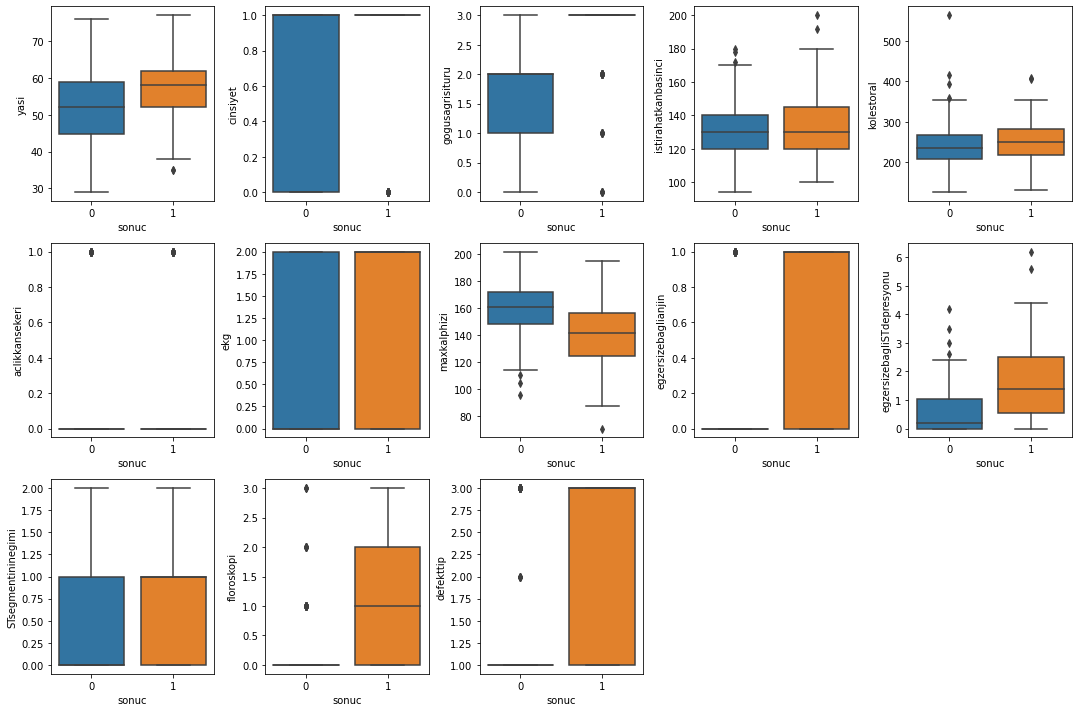

In [28]:
# Aykırı değer analizi
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_copy.columns[:-1], 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df_copy['sonuc'], y=df_copy[column])

plt.tight_layout()  # Grafikler arasındaki mesafeyi düzenle
plt.show()


In [29]:
# Aykırılık Tablosu Oluşturma
outlier_table = pd.DataFrame(columns=['Özellik', 'Toplam Aykırı Değer Sayısı', 'Aykırı Değer Yüzdesi'])

# Her bir özelliği dolaşarak aykırı değerleri say
for feature in df_copy.columns[:-1]:  # "sonuc" sütununu dahil etmiyoruz
    q1 = df_copy[feature].quantile(0.25)
    q3 = df_copy[feature].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    total_outliers = ((df_copy[feature] < lower_bound) | (df_copy[feature] > upper_bound)).sum()
    percentage_outliers = (total_outliers / len(df_copy)) * 100

    outlier_table = outlier_table.append({
        'Özellik': feature,
        'Toplam Aykırı Değer Sayısı': total_outliers,
        'Aykırı Değer Yüzdesi': percentage_outliers
    }, ignore_index=True)

# Toplam Aykırı Değer Yüzdesi Hesapla
total_outliers_percentage = ((outlier_table['Toplam Aykırı Değer Sayısı'].sum()) / (len(df_copy) * len(df_copy.columns[:-1]))) * 100

# Toplam Aykırı Değer Yüzdesini Tabloya Ekle
outlier_table = outlier_table.append({
    'Özellik': 'Toplam',
    'Toplam Aykırı Değer Sayısı': outlier_table['Toplam Aykırı Değer Sayısı'].sum(),
    'Aykırı Değer Yüzdesi': total_outliers_percentage
}, ignore_index=True)

# Aykırılık Tablosunu Yazdırma
outlier_table


,Özellik,Toplam Aykırı Değer Sayısı,Aykırı Değer Yüzdesi
0,yasi,0,0.000000
1,cinsiyet,0,0.000000
2,gogusagrisituru,23,7.590759
3,istirahatkanbasinci,9,2.970297
4,kolestoral,5,1.650165
5,aclikkansekeri,45,14.851485
6,ekg,0,0.000000
7,maxkalphizi,1,0.330033
8,egzersizebaglianjin,0,0.000000
9,egzersizebagliSTdepresyonu,5,1.650165


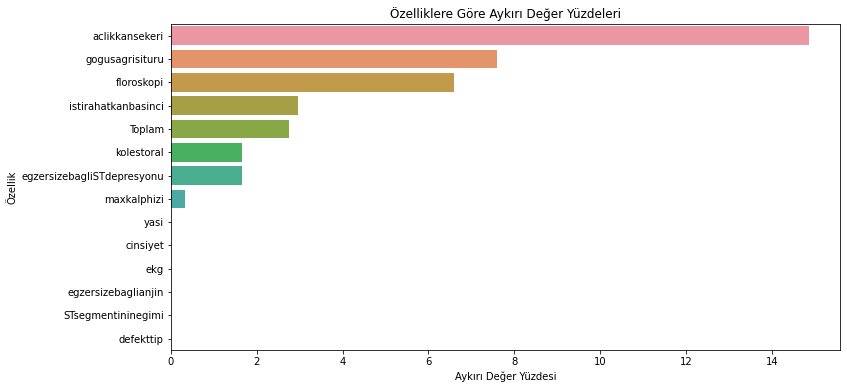

In [30]:
# Çubuk Grafik Oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(x='Aykırı Değer Yüzdesi', y='Özellik', data=outlier_table.sort_values(by='Aykırı Değer Yüzdesi', ascending=False))
plt.title('Özelliklere Göre Aykırı Değer Yüzdeleri')
plt.xlabel('Aykırı Değer Yüzdesi')
plt.ylabel('Özellik')
plt.show()

# Kategorik Verilerin Sayısallaştırılması 

İyi analiz yapmak için verilerimizi sayısala dönüştürmemiz gerekmekte, verilemizin içinde kategorik değerlerin olup olmadığını kontrol edeceğiz.

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yasi                        303 non-null    int64  
 1   cinsiyet                    303 non-null    int64  
 2   gogusagrisituru             303 non-null    int64  
 3   istirahatkanbasinci         303 non-null    int64  
 4   kolestoral                  303 non-null    int64  
 5   aclikkansekeri              303 non-null    int64  
 6   ekg                         303 non-null    int64  
 7   maxkalphizi                 303 non-null    int64  
 8   egzersizebaglianjin         303 non-null    int64  
 9   egzersizebagliSTdepresyonu  303 non-null    float64
 10  STsegmentininegimi          303 non-null    int64  
 11  floroskopi                  303 non-null    int64  
 12  defekttip                   303 non-null    int64  
 13  sonuc                       303 non

Sütun Bilgilerini görmek ve kaçtane verimiz olduğunu öğrenmek için df_copy.info() yapıyoruz. Bu kısımda kategorik değişkenlerin olmadığı int ve float değişkenler olduğunu görüyoruz. Veri setimizin 33.3 KB olduğunu bu alanda görüyoruz. 

Bu veri setinde örneğin cinsiyetin için kaç değer olduğunu,kaç türden kelime olduğunu öğrenmek için df_copy.cinsiyet.unique() değerlere bakmak istediğimizde gerekli olan bilgileri verecektir. 

In [32]:
df_copy.cinsiyet.unique()

array([1, 0])

In [33]:
df_copy.defekttip.unique()

array([2, 1, 3])

In [34]:
df_copy.STsegmentininegimi.unique()

array([2, 1, 0])

In [35]:
df_copy.isna().sum()

yasi                          0
cinsiyet                      0
gogusagrisituru               0
istirahatkanbasinci           0
kolestoral                    0
aclikkansekeri                0
ekg                           0
maxkalphizi                   0
egzersizebaglianjin           0
egzersizebagliSTdepresyonu    0
STsegmentininegimi            0
floroskopi                    0
defekttip                     0
sonuc                         0
dtype: int64

Burada değerlerimizi kategorik olsaydı "df_copy["cinsiyet"]=df_copy.cinsiyet.map({"Kadın":0,"Erkek":1})" yaparak kategorik değerleri sayısallaştıracaktık.

# 2. Öznitelik Mühendisliği (Feature Engineering)

define() işlevini kullanarak veri özelliklerini yazdıracağız. Bu kısıma count(toplam veri), mean(ortalama), std(standart sapma), min(minimum değer), 25%,50%,75%(örneğin veri setinde %25 kişi 48 yaşlarında veya %50 kişi 56 yaşında), max(maksimum değer)

In [36]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
yasi,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
cinsiyet,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
gogusagrisituru,303.0,2.158416,0.960126,0.0,2.0,2.0,3.0,3.0
istirahatkanbasinci,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
kolestoral,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
aclikkansekeri,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
ekg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
maxkalphizi,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
egzersizebaglianjin,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
egzersizebagliSTdepresyonu,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Sütun isimlerimin güncellendiğini kontrol etmek için ilk 5 veriyi yazdırıyoruz.

Her değişken için histogramları çiziyoruz.

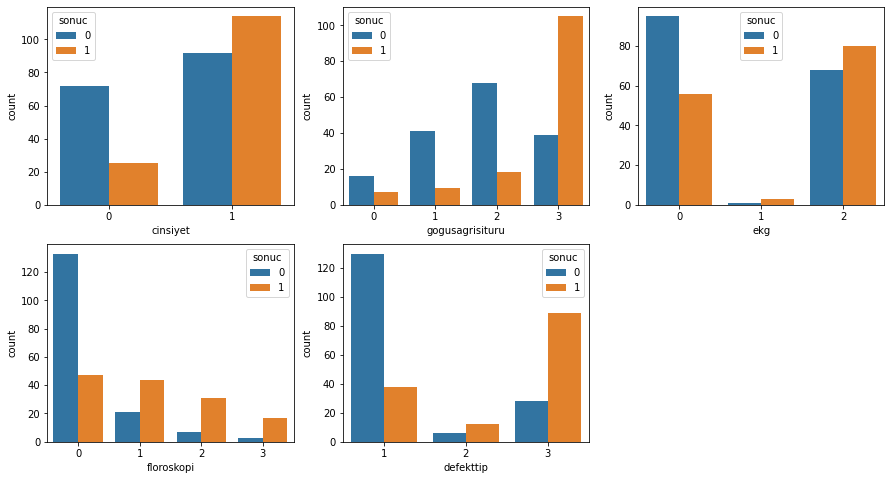

In [37]:
# Kategorik değişken görselleştirme
categorical_columns = ['cinsiyet', 'gogusagrisituru', 'ekg', 'floroskopi', 'defekttip']
plt.figure(figsize=(15, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df_copy, hue='sonuc')
plt.show()

In [38]:
df_copy.head()

,yasi,cinsiyet,gogusagrisituru,istirahatkanbasinci,kolestoral,aclikkansekeri,ekg,maxkalphizi,egzersizebaglianjin,egzersizebagliSTdepresyonu,STsegmentininegimi,floroskopi,defekttip,sonuc
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


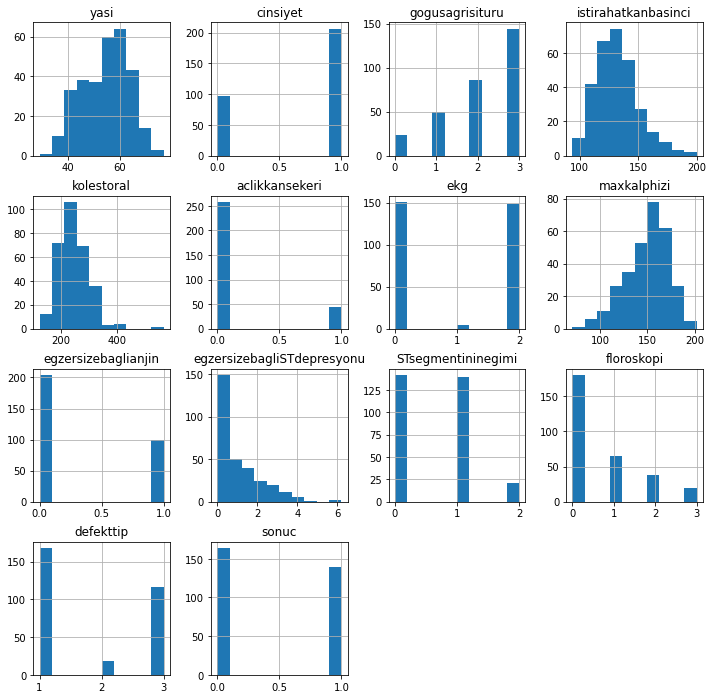

In [39]:
df_copy.hist(figsize = (12, 12))
plt.show()

# Korelasyon Matris Yorumlaması

Değişkenlerimiz için, yani veri setimizin içinde yer alan özniteliklerimizin arasındaki Pearson Korelasyon Katsayısı hesaplamalarına görsel olarak bakacağız.

Pearson Korelasyon Katsayısı

Sonucun +1 çıkması iki değişken arasında kuvvetli olumlu ilişkinin bulunduğunu, -1 ise kuvvetli olumsuz ilişkinin bulunduğunu gösterir. Korelasyon katsayısı 0 'a yaklaştıkça ilişkinin kuvveti zayıflar, sıfır ise iki değişken arasında doğrusal bir ilişkinin olmadığını gösterir.

* −1 ≤ r ≤ +1 

İlk olarak seaborn kütüphanesini kullanarak bir korelasyon matrisi oluşturduk. Özniteliklerin birbirleri ile olan ilişkilkerini renkli olarak ifade edildi.

* Pozitif korelasyona sahip iki değişkenin değerleri birlikte artar veya birlikte azalır.

* Negatif korelasyona sahip iki değişkenlerden birinin değeri artarken diğerininki azalır.

* 0' a yaklaştıkça ilişkinin kuvveti azalır.


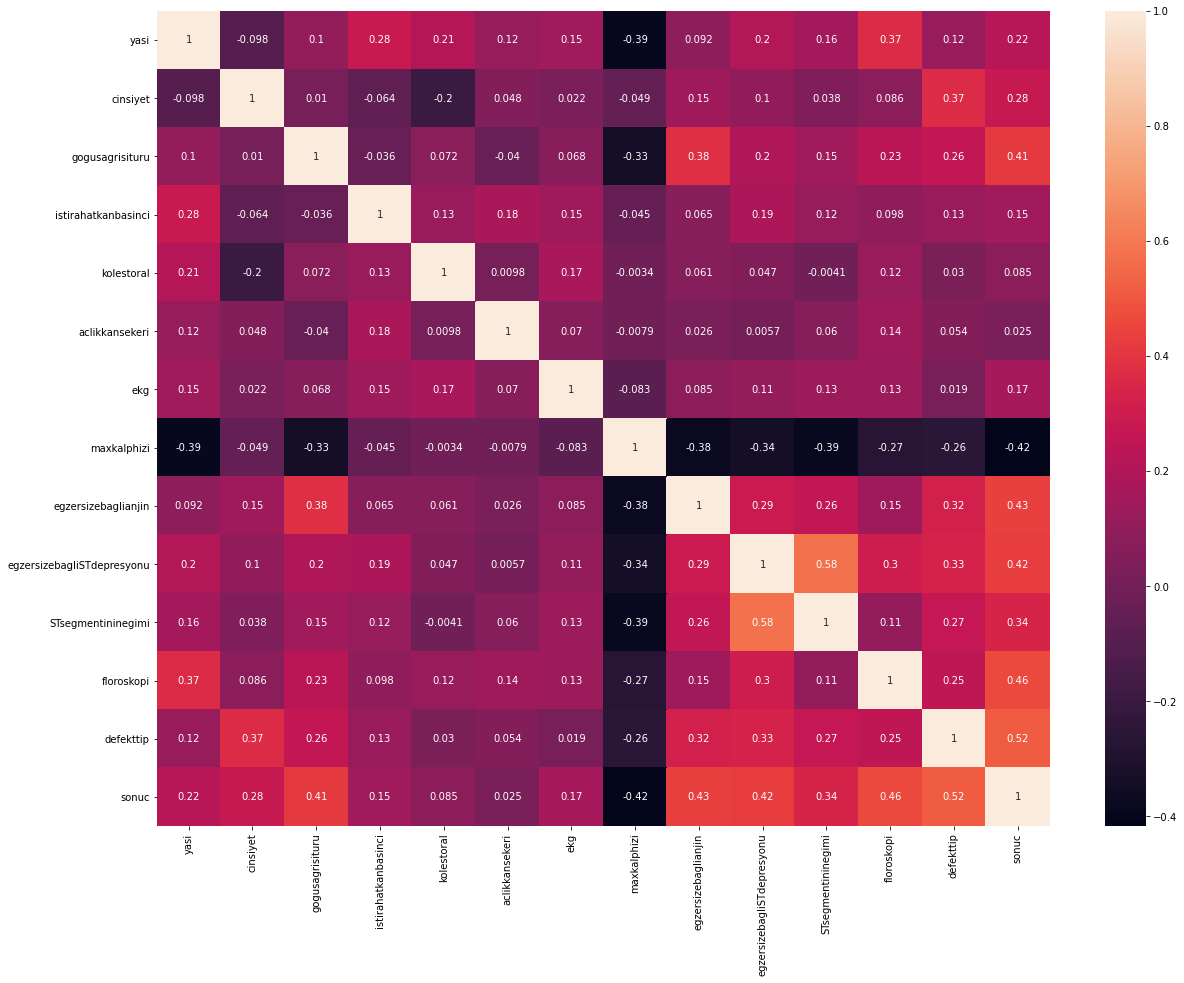

In [40]:
corr_matrix = df_copy.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Burada göğüs ağrısı ile kalp hızı ve yaş ile makismum kalp hızının arasında bir ilişki olmadığı görülüyor.floroskpi ve cinsiyet arasında da bir ilişki olmadığı görülüyor.Çünkü bu dğerler 0 a yaklaşmıştır.Diğer değerlerimizide bu doğrultuda kontrol edebiliriz. Renk koyulaştıkça aradaki ilişkininde azaldığını anlayacağız.

# K-EN Yakın Komşu Algoritması

In [41]:
df_copy.keys()

Index(['yasi', 'cinsiyet', 'gogusagrisituru', 'istirahatkanbasinci',
       'kolestoral', 'aclikkansekeri', 'ekg', 'maxkalphizi',
       'egzersizebaglianjin', 'egzersizebagliSTdepresyonu',
       'STsegmentininegimi', 'floroskopi', 'defekttip', 'sonuc'],
      dtype='object')

* x = df_copy.drop("sonuc", axis = 1)
* y = df_copy["sonuc"] 

Bu kısımda x değikeninden silindi ve y değişkenine  'sonuc' kısmı eklendi.

Oluşturacağımız eğitim ve test veri setleri ile hedef modelimizin kurgusunu oluşturmuş olacağız.

In [42]:
x = df_copy.drop("sonuc", axis = 1)
y = df_copy["sonuc"]

In [43]:
X=df_copy[['yasi', 'cinsiyet', 'gogusagrisituru', 'istirahatkanbasinci','kolestoral', 
           'aclikkansekeri', 'ekg', 'maxkalphizi','egzersizebaglianjin', 'egzersizebagliSTdepresyonu', 
           'STsegmentininegimi','floroskopi', 'defekttip']].values
y=df_copy['sonuc'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

Aşağıda çalıştırılan kodda, preprocessing.StandardScaler() bu kısımda,

* STANDART SCALER

Standardizasyon işleminde, her bir sütundaki gözlem birimi ortalamadan çıkarılırılarak standart sapmaya bölünecektir. X değeri float type dönüştürülecek.

In [44]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:302]

array([[ 0.94872647,  0.68620244, -2.25177456, ...,  2.27457861,
        -0.71113139,  0.17622495],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         2.5048807 , -0.87075858],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         1.43287667,  1.22320848],
       ...,
       [ 1.50282077,  0.68620244,  0.87798549, ...,  0.64911323,
         1.43287667,  1.22320848],
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.64911323,
         0.36087264,  1.22320848],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.64911323,
         0.36087264, -0.87075858]])

Artık verileri uygun şekilde önceden işlediğimize göre, onu eğitim ve test veri kümelerine ayırabiliriz. Bir eğitim veri seti (toplam verinin yüzde 80'i) ve bir test veri seti (toplam verinin yüzde 20'si) oluşturmak için Sklearn'ün train_test_split() işlevini kullanacağız.

In [45]:
x_egitim, x_test, y_egitim, y_test=train_test_split(x,y, test_size=0.25 , random_state=0)

* Oluşturmuş olduğumuz eğitim ve test veri setleri arasındaki değer yoğunluğunu kontrol ettiğimizde;

In [46]:
print('Eğitim Seti:' ,x_egitim.shape,y_egitim.shape)
print('Test Seti:' ,x_test.shape,y_test.shape)


Eğitim Seti: (227, 13) (227,)
Test Seti: (76, 13) (76,)


* En yakın n=5 eleman üzerinden analiz gerçekleştirilecek şekilde kodumuzda belirtelim.(KNeighborsClassifier(n_neighbors=5)) 

* Oluşturduğumuz bu eğitim ve test veri seti üzerinden ortalama tahmin bakalım ( accuracy_score(y_test,yhat)))

In [47]:
n =5 
KNN = KNeighborsClassifier(n_neighbors= n)
KNN.fit(x_egitim,y_egitim)
yhat = KNN.predict(x_test)
print('Doğruluk Puanı', accuracy_score(y_test,yhat))

Doğruluk Puanı 0.8026315789473685


* Doğruluk kontorlü için Sklearn Metrics kütüphanesini ekleyip çalıştırmamız gerekmektedir. Daha sonradan doğruluk kontrol işlemini gerçekleştirebiliriz.

In [48]:
print(classification_report(y_test,yhat, target_names=['0 (Kalp Hatası Değil )', '1 (Kalp Hastası )']))

                        precision    recall  f1-score   support

0 (Kalp Hatası Değil )       0.78      0.88      0.82        40
     1 (Kalp Hastası )       0.84      0.72      0.78        36

              accuracy                           0.80        76
             macro avg       0.81      0.80      0.80        76
          weighted avg       0.81      0.80      0.80        76



35 tane hasta olmayan 26 tane hasta olan kişi bulunmaktadır.
* F1 Score değeri bize Kesinlik (Precision) ve Duyarlılık (Recall) değerlerinin harmonik ortalamasını göstermektedir.
* Doğruluk değerimizin 0,80 olduğunu görmekteyiz.
* Kesinlik (Precision) ise pozitif olarak tahminlediğimiz değerlerin gerçekten kaç adedinin pozitif olduğunu göstermektedir.
* Duyarlılık (Recall) ise pozitif olarak tahmin etmemiz gereken işlemlerin ne kadarını pozitif olarak tahmin ettiğimizi gösteren bir metriktir.

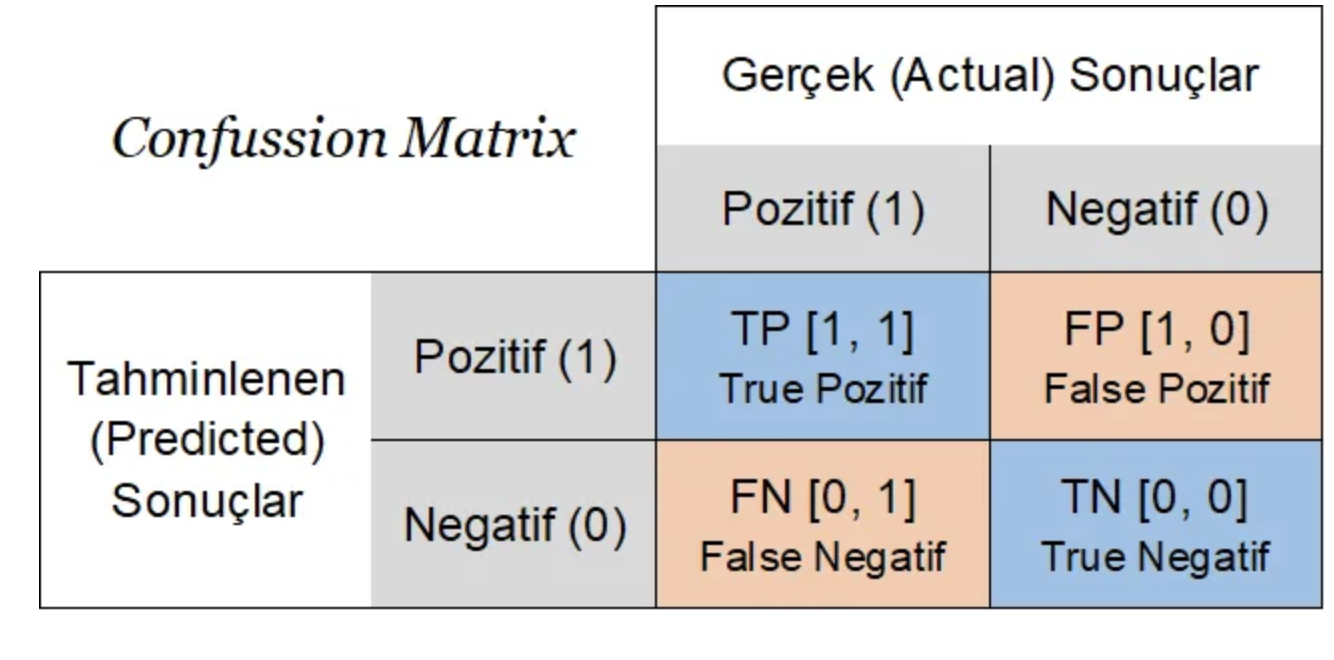

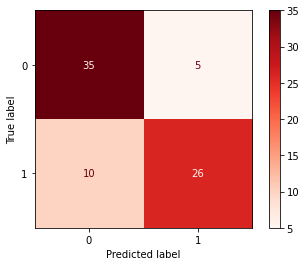

In [49]:
disp = plot_confusion_matrix(KNN, x_test,y_test, cmap='Reds')

Kod üzerinde görüldüğü üzere gerçek (actual) verilerde 39 adet hasta olmayan ve 22 adet hasta bulunmaktayken tahmin edilen verilerde ise 35 adet hasta olmayan ve 26 hasta değeri yer almaktadır. 

# Hiper Parametrelerin Optimum Değerleri ve Çapraz Doğrulama, GridSearchCV

In [50]:
k_list = list(range(1,50))
k_values = dict(n_neighbors=k_list)

In [51]:
knn_cv_model = GridSearchCV(KNN, k_values, cv=5, scoring='accuracy' , n_jobs= -1, verbose =2).fit(X_train,y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    3.4s finished


Yukarıda 245 tane fit etme işlemi gerçekleştireceğini ifade etmiştir. İlk olarak 34 tanesi dolmuştur. Yukarıdaki bilgileri bize veren verbose argümanıdır. İşlemcilerin ful performanslı çalışmasını sağlayan n_jops argümanıdır. Şu anda maksimum şekilde bilgisayarın gücünü kullanarak en iyi parametre değerleri aranmış oluyor.

Çapraz Doğrulama için bu ifade 5 kez yapılmış olacak cv= 5

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_egitim)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

In [52]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

# ROC-AUC-LOSS 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

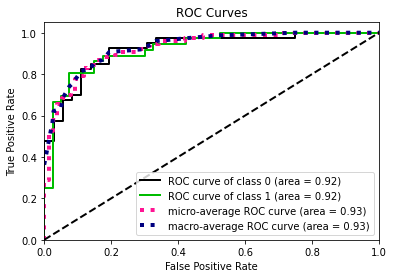

In [53]:
actual = y_test
predicted_proba = lgr.predict_proba(x_test) 
splt.plot_roc(y_test, predicted_proba)

* Grafiğe baktığımızda 0.88  çıkan iki sınıfın (class = 0(mavi çizgi), class = 1(yeşil çizgi) doğruluk oranlarının yüksek ve birbirlerine paralel olarak ilerlemiş. 
* Sınıfların geçtiği eğrinin altında yer alan bölüm AUC bölgesi ve AUC yüksek yer kapladığından model başarısının yüksek olduğunu görebiliriz. 

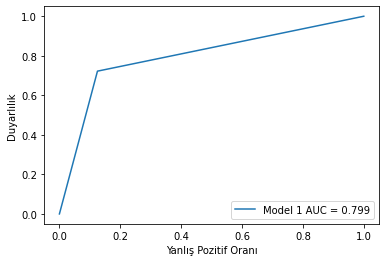

In [54]:
ypo, duyarlilik, esik_degerleri = roc_curve(y_test,yhat)
auc_1 = auc(ypo,duyarlilik)

plt.plot(ypo,duyarlilik,label="Model 1 AUC = %0.3f" %auc_1)

plt.xlabel("Yanlış Pozitif Oranı")
plt.ylabel("Duyarlılık")

plt.legend(loc='lower right')
plt.show()

AUC bölgesi yüksek yer kapladığından model başarısının yüksek olduğunu görebiliriz. Yukarıda belirtilen AUC grafiğinde sonucun 0.789 olduğunu görmekteyiz. Eğer bu değer 0.789 üzerinde olsaydı çok iyi bir değer diyebilirdik ama şimdi sadece iyi bir değer diyebiliriz. Makine öğreniminde modelim, 1'e ne kadar yakınsa o kadar iyidir. 


AUC değerini skor olarak kod üzerinden bakacak olursak:

In [55]:
print(mt.roc_auc_score(actual, yhat))

0.7986111111111112


# Karar Ağaçları (Decision Tree)

In [58]:
x=df_copy[["yasi",
                    "cinsiyet",
                    "gogusagrisituru",
                    "istirahatkanbasinci",
                    "kolestoral",
                    "aclikkansekeri",
                    "ekg",
                    "maxkalphizi",
                    "egzersizebaglianjin",
                    "egzersizebagliSTdepresyonu",
                    "STsegmentininegimi",
                    "floroskopi",
                    "defekttip",
                     "sonuc"
                    ]].values
y=df_copy['sonuc'].values

In [59]:
print('Class Labels:', np.unique(y))

Class Labels: [0 1]


In [60]:
X = df_copy.drop("sonuc", axis = 1)
y = df_copy["sonuc"]

Karar Ağacı algoritması ve elde edilen sonuc

* Artık verileri, uygun şekilde eğitim ve test veri kümelerine ayırabiliriz. Bir eğitim veri seti (toplam verinin yüzde 70'i) ve bir test veri seti (toplam verinin yüzde 30'u) oluşturmak için Sklearn'ün train_test_split() işlevini kullanacağız.
* Karar ağacı modeli oluşturacağız.
* Modeli eğitim verisine ‘fit’ edeceğiz.

Veri setimizi train ve test olarak ikiye ayırıyoruz

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [62]:
rf = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

RandomForestClassifier, birden fazla karar ağacını kullanarak daha uyumlu modeller üreterek daha uyumlu sınıflandırma yapmaya çalışan bir sınıflandırma modeli oluşturmaktır.

Karar ağacının görselleştirilmesi için aşağıdaki kodu çalıştırıyoruz.

* Karar ağacını görselleştirmek için  graf tanım dosyası (dot) olarak yapıyoruz yani dışa aktarıyoruz. 
* Graphviz ile PDF ve PNG gibi bir formata dönüştürebiliriz. PNG dosyasına dönüştürmek için gerekli komut:

In [63]:
karar_agaci = rf.estimators_[20]
dot_data1 = StringIO()
export_graphviz(karar_agaci, feature_names = X.columns,
               out_file = dot_data1, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())
graph.write_png('karar_agaci.png')
Image(value = graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xd2\x00\x00\x01\xf1\x08\x02\x00\x00\x00\'m\x06\x…

In [64]:
rf = RandomForestClassifier(n_estimators=100, max_depth = 8, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [65]:
print('Doğruluk Puanı', accuracy_score(y_test,predictions))

Doğruluk Puanı 0.8421052631578947


In [66]:
plt.figure(figsize=(16, 9))
print(classification_report(y_test, predictions, target_names=['0 (Kalp Hatası Değil )', '1 (Kalp Hastası )']))


                        precision    recall  f1-score   support

0 (Kalp Hatası Değil )       0.83      0.87      0.85        39
     1 (Kalp Hastası )       0.86      0.81      0.83        37

              accuracy                           0.84        76
             macro avg       0.84      0.84      0.84        76
          weighted avg       0.84      0.84      0.84        76



<Figure size 1152x648 with 0 Axes>

In [67]:
df_copy.head()

,yasi,cinsiyet,gogusagrisituru,istirahatkanbasinci,kolestoral,aclikkansekeri,ekg,maxkalphizi,egzersizebaglianjin,egzersizebagliSTdepresyonu,STsegmentininegimi,floroskopi,defekttip,sonuc
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


Normalizasyon – Feature Scaling

In [68]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [69]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [70]:
y_pred = classifier.predict(X_test)

Kod üzerinde görüldüğü üzere gerçek (actual) verilerde 41 adet hasta olmayan ve 20 adet hasta bulunmaktayken tahmin edilen verilerde ise 31 adet hasta olmayan ve 30 hasta değeri yer almaktadır.

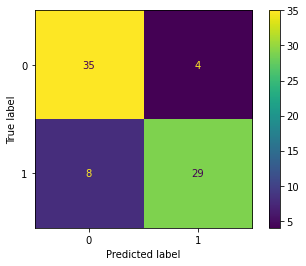

In [71]:
SVC(random_state=0)
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [72]:
predicted_proba = lgr.predict_proba(X_test)

# ROC-AUC-LOSS

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

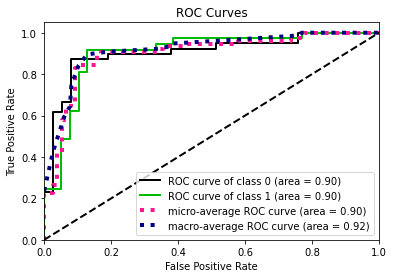

In [73]:
splt.plot_roc(y_test, predicted_proba)

* Grafiğe baktığımızda 0.90 üzerine çıkan iki sınıfın (class = 0(mavi çizgi), class = 1(yeşil çizgi) doğruluk oranlarının yüksek ve birbirlerine paralel olarak ilerlemiş ama bazı yerlerde biri artarken diğeri sabit kalmış.
* Sınıfların geçtiği eğrinin altında yer alan bölüm AUC bölgesi ve burada AUC yüksek yer kapladığından model başarısının yüksek olduğunu görebiliriz.

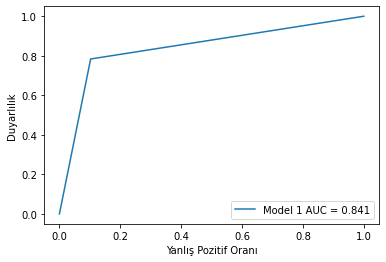

In [74]:
ypo, duyarlilik, esik_degerleri = roc_curve(y_test,y_pred)
auc_1 = auc(ypo,duyarlilik)

plt.plot(ypo,duyarlilik,label="Model 1 AUC = %0.3f" %auc_1)

plt.xlabel("Yanlış Pozitif Oranı")
plt.ylabel("Duyarlılık")

plt.legend(loc='lower right')
plt.show()

* ROC eğrisi altında kalan alandır. AUC değerimiz 0.816'dır. Bu da ortalama bir değerdir.
* Kapsanan alanım ne kadar büyükse, makine öğrenme modelim de, verilen sınıfları ayırt etmede daha iyidir. Burada da 0.816 olarak görünüyor. Bu değerde iyi bir değerdir ama ortalama iyi değerin altındadır.

# Multi-layer Perceptron Classifier (MLPClassifier)

Ayrıca, rastgele çekirdek parametresini belirli bir sayıya ayarlayalım (42 diyelim (bunun her şeyin cevabı olduğunu zaten biliyoruz!)), Böylece çalıştırdığımız kod her çalıştırdığımızda bize aynı çıktıyı verecek (umarım!)

Şimdi bir sonraki adım, girdimizi oluşturmaktır. İlk olarak, yalnızca ilk sütunun yararlı bir sütun olduğu, geri kalanının yararlı olabileceği ya da olmayabileceği ve potansiyel bir gürültü olabileceği sahte bir veri kümesini ele alalım.

Şimdi hatırlayabileceğiniz gibi, ağımızı eğitebilmemiz için girdinin devriğini almalıyız. Hadi çabuk yapalım.

In [75]:
x=df_copy[["yasi",
                    "cinsiyet",
                    "gogusagrisituru",
                    "istirahatkanbasinci",
                    "kolestoral",
                    "aclikkansekeri",
                    "ekg",
                    "maxkalphizi",
                    "egzersizebaglianjin",
                    "egzersizebagliSTdepresyonu",
                    "STsegmentininegimi",
                    "floroskopi",
                    "defekttip",
                     "sonuc"
                    ]].values
y=df_copy['sonuc'].values

In [76]:
X = df_copy.drop(['sonuc'], axis=1)
y = df_copy['sonuc']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [78]:
sc = StandardScaler()
scaler=sc.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
mlpclf = MLPClassifier(hidden_layer_sizes=(150, 103, 50), max_iter=303, activation='relu', solver='adam')
mlpclf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(150, 103, 50), max_iter=303)

In [80]:
y_pred = classifier.predict(X_test)

In [81]:
predicted = lgr.predict(X_test)
predicted_proba = lgr.predict_proba(X_test)

# ROC-AUC-LOSS

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

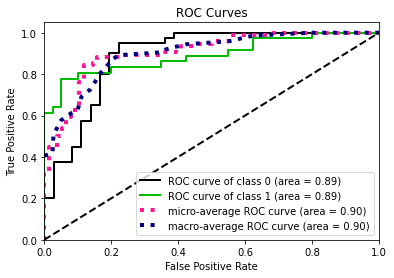

In [82]:
splt.plot_roc(y_test, predicted_proba)

Grafiğe baktığımızda 0.90 üzeri olan iki sınıfın (class = 0(mavi çizgi), class = 1(yeşil çizgi) doğruluk oranlarının yüksek ve birbirlerine paralel olarak ilerlemiş ama bazı yerlerde biri artarken diğeri sabit kalmış.
Sınıfların geçtiği eğrinin altında yer alan bölüm AUC bölgesi ve burada AUC yüksek yer kapladığından model başarısının yüksek olduğunu görebiliriz.

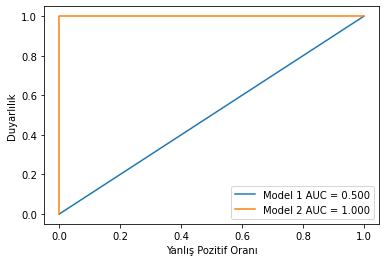

In [83]:
ypo, duyarlilik, esik_degerleri = roc_curve(y_test,y_pred)
auc_1 = auc(ypo,duyarlilik)

ypo_2, duyarlilik_2, esik_degerleri_2 = roc_curve(y_test,y_test)
auc_2 = auc(ypo_2,duyarlilik_2)


plt.plot(ypo,duyarlilik,label="Model 1 AUC = %0.3f" %auc_1)
plt.plot(ypo_2,duyarlilik_2,label="Model 2 AUC = %0.3f" %auc_2)

plt.xlabel("Yanlış Pozitif Oranı")
plt.ylabel("Duyarlılık")

plt.legend(loc='lower right')
plt.show()

* ROC eğrisi altında kalan alandır. AUC değerimiz 0.500'dır. Bu da ortalama bir değer değildir.AUC eğrimiz kötü bir sonuç vermiştir
* Kapsanan alanım ne kadar büyükse, makine öğrenme modelim de, verilen sınıfları ayırt etmede daha iyidir. Burada da 0.500 olarak görünüyor. Bu değerde iyi bir değer değildir.Çünkü 1 e ne kadar yakınsa AUC değerim o kadar iyi olacaktır. 
* Burada model 2 de çizdirdiğim kısım ben bu çizgiye ne kadar yakınım ona bakıyoruz. 

In [84]:
X_test = mlpclf.predict(X_test_scaled)

In [85]:
print('Doğruluk Değeri: {:.2f}'.format(accuracy_score(y_test, X_test)))

Doğruluk Değeri: 0.78


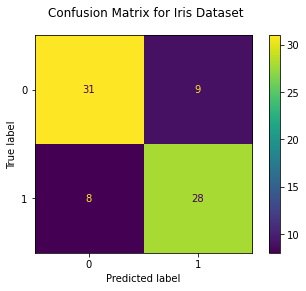

In [86]:
fig = plot_confusion_matrix(mlpclf, X_test_scaled, y_test, display_labels=mlpclf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

In [87]:
predictions = mlpclf.predict(X_test_scaled)

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.76      0.78      0.77        36

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



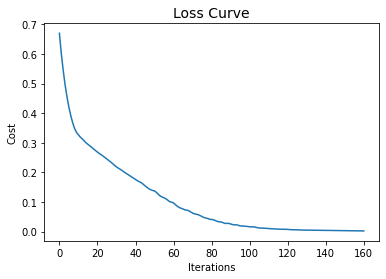

In [89]:
plt.plot(mlpclf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Loss fonksiyonu, tahmin edilen değerin, gerçek değerinden ne kadar uzak olduğunu hesaplar. Amacımız bu değeri sıfıra yaklaştırmaktır.

# Hiper Parametrelerin Optimum Değerleri ve Çapraz Doğrulama, GridSearchCV

In [90]:
mlp = MLPClassifier(max_iter=303)

In [91]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],

}

In [92]:
mlp_grid = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
mlp_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=303), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [93]:
print('Best parameters found:\n', mlp_grid.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


# Rasgele Orman Kümeleri (Random Forests)

Random Forest (Rastgele Orman) algoritması; birden çok karar ağacı üzerinden her bir karar ağacını farklı bir gözlem örneği üzerinde eğiterek çeşitli modeller üretip, sınıflandırma oluşturmanızı sağlamaktadır.

Amacı, veri setimiz üzerinde çeşitli modeller oluşturulması ile beraber veri setimizi yeniden ve daha derin keşfetmemizi sağlar.

Çalışmamıza ilgili verilerimizi dahil edelim ve önizleme gerçekleştirelim;

In [96]:
df_copy.rename(columns = { "age":"yasi",
                    "sex":"cinsiyet",
                    "cp":"gogusagrisituru",
                    "trestbps":"istirahatkanbasinci",
                    "chol":"kolestoral",
                    "fbs":"aclikkansekeri",
                    "restecg":"ekg",
                    "thalach":"maxkalphizi",
                    "exang":"egzersizebaglianjin",
                    "oldpeak":"egzersizebagliSTdepresyonu",
                    "slope":"STsegmentininegimi",
                    "ca":"floroskopi",
                    "thal":"defekttip",
                    "target":"sonuc"}, inplace = True)

In [97]:
df_copy.head()

,yasi,cinsiyet,gogusagrisituru,istirahatkanbasinci,kolestoral,aclikkansekeri,ekg,maxkalphizi,egzersizebaglianjin,egzersizebagliSTdepresyonu,STsegmentininegimi,floroskopi,defekttip,sonuc
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


Veri kümemizi test ve eğitim  olarak ikiye bölüyoruz. 
* Veri setimizi 30% Test, 70% eğitim olarak belirledik.
* test_size ile verilerin %kaçının test için kullanılacağını ifade belirleyebilmekteyiz.
* train_size ile verilerin %kaçının eğitim için kullanılacağını ifade belirleyebilmekteyiz.
* shuffle ile verilerin bölünmeden karıştırma uygulanıp-uygulanmayacağınız belirleyebilmekteyiz.
* random_state ile bölünmeden önce verilere-veriye uygulanan karıştırmayı kontrol edebilmekteyiz.

In [98]:
X = df_copy.drop(['sonuc'], axis=1)
y = df_copy['sonuc']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [100]:
clf=RandomForestClassifier(n_estimators=120)
clf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

Eğitim işleminden sonra gerçek ve tahmin edilen değerleri kullanarak doğruluk değerini kontrol edelim;


In [101]:
print("Doğruluk Değeri:",metrics.accuracy_score(y_test, y_pred))

Doğruluk Değeri: 0.9473684210526315


Accuracy değeri modelde doğru tahmin ettiğimiz alanların toplam veri kümesine oranı ile hesaplanır.

-Eğitim işlemlerimizin tamamlanmasından sonra  tahminlememizi tek bir belirlediğiniz öğe içinde kontrol edebiliriz

In [102]:
clf=RandomForestClassifier(n_estimators=120)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120)

In [103]:
sc = StandardScaler()
scaler=sc.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test_scaled)

In [105]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)

LogisticRegression()

In [106]:
actual = y_test

In [107]:
predicted = lgr.predict(X_test)
predicted_proba = lgr.predict_proba(X_test)

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.98      0.75        41
           1       0.91      0.29      0.43        35

    accuracy                           0.66        76
   macro avg       0.76      0.63      0.59        76
weighted avg       0.75      0.66      0.61        76



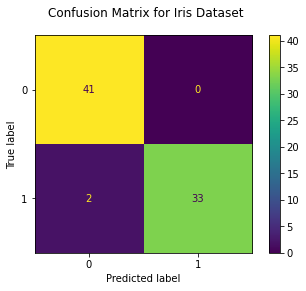

In [109]:
fig = plot_confusion_matrix(mlpclf, X_test_scaled, y_test, display_labels=mlpclf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

# ROC-AUC-LOSS

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

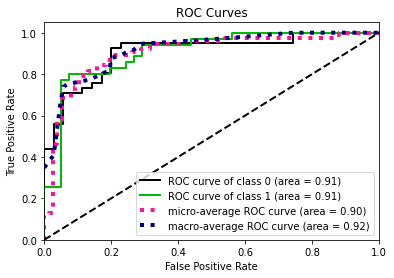

In [110]:
splt.plot_roc(actual, predicted_proba)

Grafiğe baktığımızda 0.90 üzeri olan iki sınıfın (class = 0(mavi çizgi), class = 1(yeşil çizgi) doğruluk oranlarının yüksek ve birbirlerine paralel olarak ilerlemiş ama bazı yerlerde biri artarken diğeri sabit kalmış. Sınıfların geçtiği eğrinin altında yer alan bölüm AUC bölgesi ve burada AUC yüksek yer kapladığından model başarısının yüksek olduğunu görebiliriz.

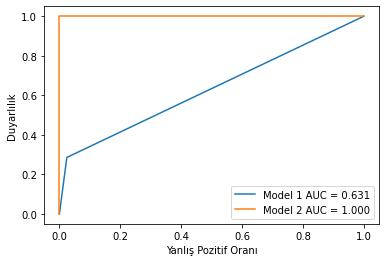

In [111]:
ypo, duyarlilik, esik_degerleri = roc_curve(actual,y_pred)
auc_1 = auc(ypo,duyarlilik)

ypo_2, duyarlilik_2, esik_degerleri_2 = roc_curve(actual,y_test)
auc_2 = auc(ypo_2,duyarlilik_2)


plt.plot(ypo,duyarlilik,label="Model 1 AUC = %0.3f" %auc_1)
plt.plot(ypo_2,duyarlilik_2,label="Model 2 AUC = %0.3f" %auc_2)

plt.xlabel("Yanlış Pozitif Oranı")
plt.ylabel("Duyarlılık")

plt.legend(loc='lower right')
plt.show()

ROC eğrisi altında kalan alandır. AUC değerimiz 0.500'dır. Bu da ortalama bir değer değildir.AUC eğrimiz kötü bir sonuç vermiştir
Kapsanan alanım ne kadar büyükse, makine öğrenme modelim de, verilen sınıfları ayırt etmede daha iyidir. Burada da 0.500 olarak görünüyor. Bu değerde iyi bir değer değildir.Çünkü 1 e ne kadar yakınsa AUC değerim o kadar iyi olacaktır.
Burada model 2 de çizdirdiğim kısım ben bu çizgiye ne kadar yakınım ona bakıyoruz.

In [112]:
print(mt.log_loss(actual, predicted_proba))

0.39733031852120476


# Lojistik Regrasyon

Bu sınıflandırmada bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kuracağız. Bağımlı değişkenler kategorikdir. Lojistik Regrasyonun esnek kullanımı vardır. Burada bağımlı değişkeni 1 olarak tanımlayarak olasılığı hesaplayacağız. Üretilen değerler 0 ile 1 arasında olur.

Bağımsız değişken değerleri geldiğinde bu bağımsız değişken değerlerine karşılık oluşabilecek olan bağımlı değişkenin değerlerini tahmin etmeye çalışacağız.

# Lojistik Regrasyon ve Tahmini

Bazı gelen uyarılar için ilgili olan uyarıları kapatacağız.

In [113]:
import warnings 
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)


Burada kişinin kalp hastası olup olmadığını tahmin edeceğiz. Kalp hastalığını, sonuc kısmından kontrol edebiliriz. 
(0: Kalp Hastası Değil 1:Kalp Hastası) örneğin, Bağımsız değişkenleri yerine yazarken bağımlı değişkeni yani sonucu bulmaya çalışacağız. 

# Model ve Tahmin

In [114]:
df_copy["sonuc"].value_counts()

0    164
1    139
Name: sonuc, dtype: int64

Burada 0 sınıfından 164 ve 1 sınıfından da 139 tane olduğunu görüyoruz.

In [115]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
yasi,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
cinsiyet,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
gogusagrisituru,303.0,2.158416,0.960126,0.0,2.0,2.0,3.0,3.0
istirahatkanbasinci,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
kolestoral,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
aclikkansekeri,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
ekg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
maxkalphizi,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
egzersizebaglianjin,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
egzersizebagliSTdepresyonu,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Tekrardan, bağımsız Değişkenlerin betimsel istatisliklerini inceleyebiliriz. 

Aşağıda yazdığımız kodda y (bağımlı değişken) değişkenine sonuc değerlerini verdik ve x değişkeninede sonuc dışındaki değerleri al komutunu veriyoruz.

In [116]:
y=df_copy["sonuc"]
X=df_copy.drop(["sonuc"],axis=1)

Çalıştırdıktan sonra gözlemle işlemlerimizi gerçekleştiriyoruz.

In [117]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: sonuc, dtype: int64

In [118]:
X.head()

,yasi,cinsiyet,gogusagrisituru,istirahatkanbasinci,kolestoral,aclikkansekeri,ekg,maxkalphizi,egzersizebaglianjin,egzersizebagliSTdepresyonu,STsegmentininegimi,floroskopi,defekttip
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1


Modelleme basamağına geçiş yapabiliriz.

Gerçek değerler ile tahmin edilen değerlerin arasındaki farkların karelerin toplamını ifade etmek için "LogisticRegression" kullanacağız 

In [119]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)

Katsayımızı görmek için .intercept_ kullandık.

In [120]:
loj_model.intercept_

array([-0.69470154])

Bağımsız değişkenlere erişmek içinde katsayımıza bakabiliriz. Burada aşağıda yer alan katsayıları veri setimizde yer alan veriler ile sırasıyla çarptıktan sonra başlarına sabiti ekledikten sonra çıkacak olan değer üzerinden bu kişinin kalp hastalığına sahip olup olmadığına yönelik bir tahmin etme işlemi gerçekleştirmiş olacağız.

In [121]:
loj_model.coef_

array([[-0.03631539,  0.92157296,  0.49220089,  0.01616826,  0.00277853,
        -0.42952674,  0.24327251, -0.03244522,  0.79886456,  0.27430208,
         0.37897351,  1.14212231,  0.6965418 ]])

Loj_model fonksiyonunu kullanarak, bu model içerisine bağımsız değişken değerlerini girdiğimizde tahmin etme işlemi gerçekleşicek

In [122]:
loj_model.predict(X)[0:10]

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

Yukarıda y'nin tahmin edilen değerleri gelmiş oldu.Şimdi gerçek değerelere bakalım.

In [123]:
y[0:10]

0    0
1    1
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: sonuc, dtype: int64

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Hiper Parametrelerin Optimum Değerleri ve Çapraz Doğrulama, GridSearchCV

Uygun parametlerimizi bulmak için

In [125]:
?loj_model

Aşağıdaki kodda y'nin tahmin edilen değerlerine ulaşacağız.

In [126]:
y_pred=loj_model.predict(X_test)

In [127]:
y = y_train

In [128]:
print("Doğruluk Değeri:",metrics.accuracy_score(y_test, y_pred))

Doğruluk Değeri: 0.8791208791208791


In [129]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.8355555555555556

Yukarıdaki kodda birden fazla hata hesaplama işlemi gerçekleştirmiş olduk. Eğer kodumuza cv = 10' u eklersek 1o tane hesaplama kodunu gerçekleştirmiş olacağız ve sonuna mean() ekleyerek ortalamasını alabiliriz.

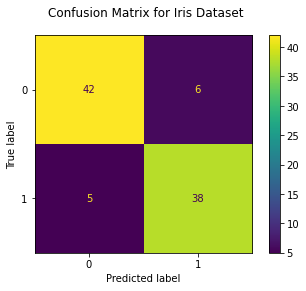

In [130]:
fig = plot_confusion_matrix(loj_model, X_test, y_test, display_labels=mlpclf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        48
           1       0.86      0.88      0.87        43

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



Yukarıdaki kodda sınıflandırma raporunu gözlemleyebiliriz.

Bizim yaptığımız tahmin değerleri 1 ve 0 değerlerinden oluştu, bazı durumlarda 1 ve 0 değerlerinden değilde diğer olacasılık değerlerinin kendisinden almak istersek, aşağıdaki kodu çalıştırmamız gerekecektir.

In [132]:
loj_model.predict_proba(X_test)[0:10]

array([[0.34550569, 0.65449431],
       [0.10984824, 0.89015176],
       [0.24726176, 0.75273824],
       [0.48452816, 0.51547184],
       [0.29555687, 0.70444313],
       [0.1061069 , 0.8938931 ],
       [0.04851252, 0.95148748],
       [0.00379974, 0.99620026],
       [0.61180671, 0.38819329],
       [0.55580978, 0.44419022]])

Burada 0.5 den yukarıdaysa 1 , 0.5 den aşağıdaysa 0 değerini alır.

In [133]:
predict_proba=loj_model.predict_proba(X_test)

# ROC-AUC-LOSS

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

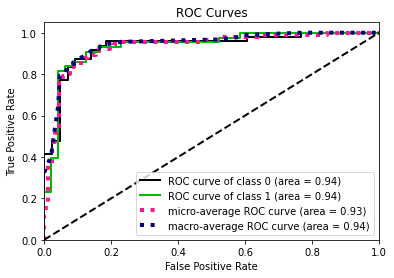

In [134]:
splt.plot_roc(y_test, predict_proba)

Grafiğe baktığımızda 0.90 üzeri olan iki sınıfın (class = 0(mavi çizgi), class = 1(yeşil çizgi) doğruluk oranlarının yüksek ve birbirlerine paralel olarak ilerlemiş ama bazı yerlerde biri artarken diğeri sabit kalmış. Sınıfların geçtiği eğrinin altında yer alan bölüm AUC bölgesi ve burada AUC yüksek yer kapladığından model başarısının yüksek olduğunu görebiliriz.

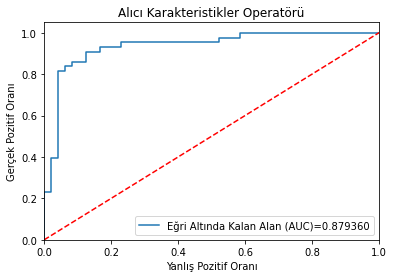

In [135]:
log_roc_auc = roc_auc_score(y_test,loj_model.predict(X_test))
fpr, tpr, threshols =roc_curve(y_test,loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label = 'Eğri Altında Kalan Alan (AUC)=%2f' % log_roc_auc)
plt.plot([0,1,0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('Gerçek Pozitif Oranı')
plt.xlabel('Yanlış Pozitif Oranı')
plt.title('Alıcı Karakteristikler Operatörü')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

* Bu kısımda farklı olarak hem roc eğrisini çizdirdim hemde auc değerini gösterimini sağladım.
* ROC eğrisi altında kalan alandır. AUC değerimiz 0.879'dır. Bu da ortalama bir değerdir.AUC eğrimiz kötü bir sonuç vermemiştir. 
* Kapsanan alanım ne kadar büyükse, makine öğrenme modelim de, verilen sınıfları ayırt etmede daha iyidir. 
* Burada da 0.879 olarak görünüyor. Bu değer iyi bir değerdir.Çünkü 1 e ne kadar yakınsa AUC değerim o kadar iyi olacaktır. 

# Destek Vektör Makineleri

In [136]:
y=df_copy["sonuc"]
X=df_copy.drop(["sonuc"],axis=1)

In [137]:
df_copy.head()

,yasi,cinsiyet,gogusagrisituru,istirahatkanbasinci,kolestoral,aclikkansekeri,ekg,maxkalphizi,egzersizebaglianjin,egzersizebagliSTdepresyonu,STsegmentininegimi,floroskopi,defekttip,sonuc
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [139]:
svm_model = SVC(kernel= "linear" ,probability=True).fit(X_train,y_train)

In [140]:
svm_model

SVC(kernel='linear', probability=True)

Aşağıdaki kodda y'nin tahmin edilen değerlerine ulaşacağız.

In [141]:
y_pred = svm_model.predict(X_test)

In [142]:
print("Doğruluk Değeri:",metrics.accuracy_score(y_test, y_pred))

Doğruluk Değeri: 0.881578947368421


In [143]:
svm=SVC()

In [144]:
svm_params = {"C":np.arange(1.10),"kernel":["linear","rbf"]}

In [145]:
svm_cv_model = GridSearchCV(svm,svm_params,cv=5, n_jobs= -1, verbose =2).fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished


Yukarıda 20 tane fit etme işlemi gerçekleştireceğini ifade etmiştir. İlk olarak 16 tanesi dolmuştur. Yukarıdaki bilgileri bize veren verbose argümanıdır. İşlemcilerin ful performanslı çalışmasını sağlayan n_jops argümanıdır. Şu anda maksimum şekilde bilgisayarın gücünü kullanarak en iyi parametre değerleri aranmış oluyor. 

Çapraz Doğrulama için bu ifade 5 kez yapılmış olacak cv= 5

In [146]:
svm_cv_model.best_score_

0.8325603864734299

In [147]:
svm_cv_model.best_params_

{'C': 1.0, 'kernel': 'linear'}

Kernel'ımızı linear olarak seçilmiş ve ceza parametresi değerinide 1.0 olarak seçilmiş

In [148]:
svm_tuned = SVC(C=1.0, kernel="linear",probability=True).fit(X_train,y_train)

In [149]:
y_pred = svm_tuned.predict(X_test)

In [150]:
accuracy_score(y_test,y_pred)

0.881578947368421

Yukarıda bulunan test hatası değeri ile farklılık göstermedi.

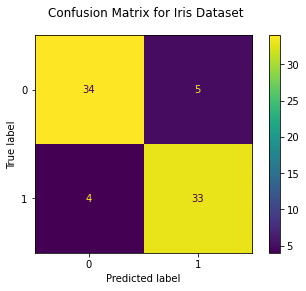

In [151]:
fig = plot_confusion_matrix(svm_cv_model,X_test, y_test, display_labels=mlpclf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.87      0.89      0.88        37

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [153]:
y_pred=svm_tuned.predict(X_test)

In [154]:
predicted_proba = svm_tuned.predict_proba(X_test)

# ROC-AUC-LOSS

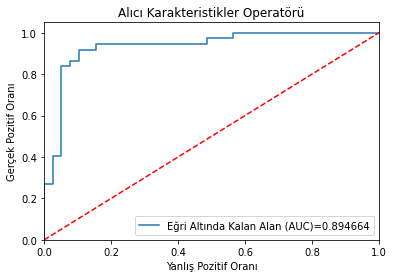

In [155]:
log_roc_auc = roc_auc_score(y_test,loj_model.predict(X_test))
fpr, tpr, threshols =roc_curve(y_test,loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label = 'Eğri Altında Kalan Alan (AUC)=%2f' % log_roc_auc)
plt.plot([0,1,0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('Gerçek Pozitif Oranı')
plt.xlabel('Yanlış Pozitif Oranı')
plt.title('Alıcı Karakteristikler Operatörü')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

* Bu kısımda farklı olarak hem roc eğrisini çizdirdim hemde auc değerini gösterimini sağladım.
* ROC eğrisi altında kalan alandır. AUC değerimiz 0.918'dır. Bu da yüksek bir değerdir.AUC eğrimiz kötü bir sonuç vermemiştir. 
* Kapsanan alanım ne kadar büyükse, makine öğrenme modelim de, verilen sınıfları ayırt etmede daha iyidir. 
* Burada da 0.918 olarak görünüyor. Bu değer iyi bir değerdir.Çünkü 1 e ne kadar yakınsa AUC değerim o kadar iyi olacaktır. 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

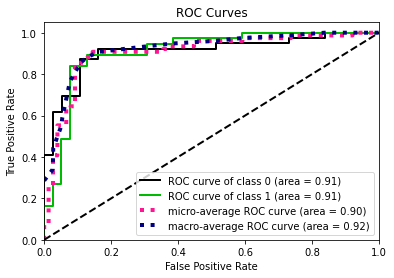

In [156]:
splt.plot_roc(y_test, predicted_proba)

* Grafiğe baktığımızda 0.90 üzeri olan iki sınıfın (class = 0(mavi çizgi), class = 1(yeşil çizgi) doğruluk oranlarının yüksek ve birbirlerine paralel olarak ilerlemiş ama bazı yerlerde biri artarken diğeri sabit kalmış.
* Sınıfların geçtiği eğrinin altında yer alan bölüm AUC bölgesi ve burada AUC yüksek yer kapladığından model başarısının yüksek olduğunu görebiliriz.
* Aynı eğriyi yukarıdaki grafiktede çizdirdim. Farklı bir kod kullanımı için

In [157]:
print(mt.log_loss(y_test, y_pred))

4.090170862386147


# Naive Bayes

In [158]:
y=df_copy["sonuc"]
X=df_copy.drop(["sonuc"],axis=1)

In [159]:
df_copy.head()

,yasi,cinsiyet,gogusagrisituru,istirahatkanbasinci,kolestoral,aclikkansekeri,ekg,maxkalphizi,egzersizebaglianjin,egzersizebagliSTdepresyonu,STsegmentininegimi,floroskopi,defekttip,sonuc
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scikit-learn kütüphanesi ile naive_bayes, GaussianNB sınıfından oluşturacağımız classifier nesnesi ile modelimiz oluşturacağız.

In [161]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [162]:
y_pred = classifier.predict(X_test)

In [163]:
print("Doğruluk Değeri:",metrics.accuracy_score(y_test, y_pred))

Doğruluk Değeri: 0.8421052631578947


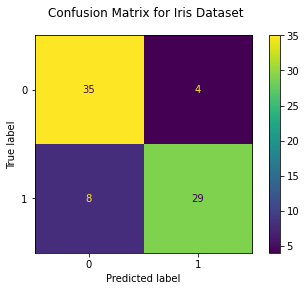

In [167]:
fig = plot_confusion_matrix(nbModel_grid,X_test, y_test, display_labels=mlpclf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

# Hiper Parametrelerin Optimum Değerleri ve Çapraz Doğrulama, GridSearchCV

In [168]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=30)}

In [169]:
nbModel_grid = GridSearchCV(classifier, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


GaussianNB(var_smoothing=2.21221629107045e-05)


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished


Yukarıda 300 tane fit etme işlemi gerçekleştireceğini ifade etmiştir. İlk olarak 56 tanesi dolmuştur. Yukarıdaki bilgileri bize veren verbose argümanıdır. İşlemcilerin ful performanslı çalışmasını sağlayan n_jops argümanıdır. Şu anda maksimum şekilde bilgisayarın gücünü kullanarak en iyi parametre değerleri aranmış oluyor.

Çapraz Doğrulama için bu ifade 10 kez yapılmış olacak cv= 10

In [170]:
nbModel_grid.best_score_

0.841501976284585

In [171]:
nbModel_grid.best_params_

{'var_smoothing': 2.21221629107045e-05}

In [172]:
y_pred = nbModel_grid.predict(X_test)

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        39
           1       0.88      0.78      0.83        37

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



In [174]:
y_pred=nbModel_grid.predict(X_test)

In [175]:
predicted_proba = nbModel_grid.predict_proba(X_test)

# ROC-AUC-LOSS

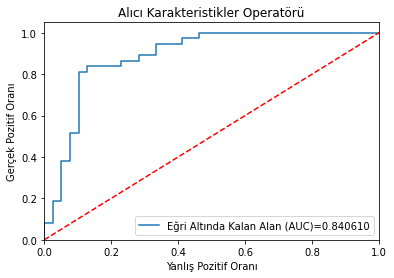

In [176]:
log_roc_auc = roc_auc_score(y_test,nbModel_grid.predict(X_test))
fpr, tpr, threshols =roc_curve(y_test,nbModel_grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label = 'Eğri Altında Kalan Alan (AUC)=%2f' % log_roc_auc)
plt.plot([0,1,0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('Gerçek Pozitif Oranı')
plt.xlabel('Yanlış Pozitif Oranı')
plt.title('Alıcı Karakteristikler Operatörü')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

* Bu kısımda farklı olarak hem roc eğrisini çizdirdim hemde auc değerini gösterimini sağladım.
* ROC eğrisi altında kalan alandır. AUC değerimiz 0.854'dır. Bu da  bir değerdir.AUC eğrimiz kötü bir sonuç vermemiştir.
* Kapsanan alanım ne kadar büyükse, makine öğrenme modelim de, verilen sınıfları ayırt etmede daha iyidir.
* Burada da 0.854 olarak görünüyor. Bu değer iyi bir değerdir.Çünkü 1 e ne kadar yakınsa AUC değerim o kadar iyi olacaktır.

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

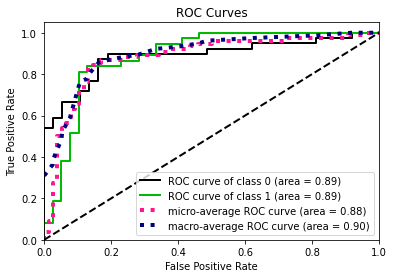

In [177]:
splt.plot_roc(y_test, predicted_proba)

Grafiğe baktığımızda 0.90 üzeri olan iki sınıfın (class = 0(mavi çizgi), class = 1(yeşil çizgi) doğruluk oranlarının yüksek ve birbirlerine paralel olarak ilerlemiş ama bazı yerlerde biri artarken diğeri sabit kalmış.
Sınıfların geçtiği eğrinin altında yer alan bölüm AUC bölgesi ve burada AUC yüksek yer kapladığından model başarısının yüksek olduğunu görebiliriz.
Aynı eğriyi yukarıdaki grafiktede çizdirdim. Farklı bir kod kullanımı için

In [178]:
print(mt.log_loss(y_test, y_pred))

5.453533093798012


# Yapay Sinir Ağları (Artifical Neural Networks)

Kuvvetli makine öğrenmesi algoritmasını referans alan makine öğrenmesi algoritmalarından biridir. Buradaki amaç en küçük hata ile tahmin yapabilecek katsayılara erişmektir.

In [179]:
y=df_copy["sonuc"]
X=df_copy.drop(["sonuc"],axis=1)

In [180]:
df_copy.head()

,yasi,cinsiyet,gogusagrisituru,istirahatkanbasinci,kolestoral,aclikkansekeri,ekg,maxkalphizi,egzersizebaglianjin,egzersizebagliSTdepresyonu,STsegmentininegimi,floroskopi,defekttip,sonuc
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [182]:
mplc_model = MLPClassifier().fit(X_train,y_train)

In [183]:
mplc_model.coefs_

[array([[-3.47597614e-03, -2.22074077e-02,  1.43790968e-08, ...,
          1.08725567e-01,  6.20961005e-03,  1.81693829e-01],
        [-2.69465720e-01, -1.80135010e-08, -6.32383873e-02, ...,
          2.74414704e-01, -3.03147670e-02,  8.75137591e-02],
        [ 1.70203469e-01, -5.07325736e-02, -2.48444308e-02, ...,
          1.50972348e-01,  4.35565223e-02,  7.52692778e-02],
        ...,
        [-3.76177163e-02,  6.81413199e-03, -3.82637368e-02, ...,
          1.69117947e-01,  6.57386626e-02, -6.50854441e-03],
        [-3.17717169e-01, -6.66131499e-02, -1.51474430e-02, ...,
         -4.70374623e-02,  5.79842595e-02,  1.55086244e-01],
        [-3.00073695e-01,  7.16053646e-08, -7.21884074e-06, ...,
          1.97354344e-01, -4.17816308e-08, -9.45142543e-02]]),
 array([[-9.60492160e-02],
        [ 4.90574655e-03],
        [ 1.53366747e-08],
        [-4.85561474e-06],
        [ 1.19202445e-01],
        [ 1.03906628e-01],
        [ 8.18712251e-02],
        [ 8.58763641e-02],
        [ 1.3

Sinir ağının kullanmış olduğu farklı katmanlardaki, farklı hücrelerin birbirleri ile ilişkileri ve benzeri durumlarını ifade eden katsayılardır.

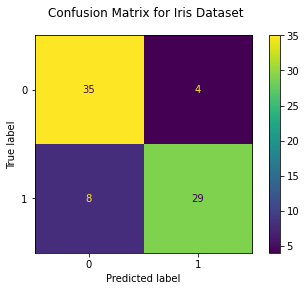

In [184]:
fig = plot_confusion_matrix(nbModel_grid,X_test, y_test, display_labels=mlpclf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

# Hiper Parametrelerin Optimum Değerleri ve Çapraz Doğrulama, GridSearchCV

Aşağıdaki kodu çalıştırdığımız zaman model ile ilgili bilgilere ulaşmak için çalıştırabiliriz.

In [185]:
?mplc_model

In [186]:
y_pred = mplc_model.predict(X_test)

In [187]:
accuracy_score(y_test,y_pred)

0.8157894736842105

Doğruluk oranımız 0.72 olarak verilmiştir.

In [188]:
mlpc_params = {"alpha":[1,5,0.1,0.01,0.03,0.005,0.0001],"hidden_layer_sizes":[(10,10),(100,100,100),(100,100),(3,5)]}

Burada yer alan "hidden_layer_sizes":[10,10] ifadesi iki katmandan oluşsun 1. katmanda 10, 2. katmanda 10 nöron olsun anlamına geliyor. [100,100,100] dediğimizde üç katmandan oluşsun.1.katmanda 100, 2.katamda 100, 3. katmada 100 olsun anlamına geliyor.

In [189]:
mlpc = MLPClassifier(solver="lbfgs")

Çözücü yaklaşımızı giriyoruz.

In [190]:
mplc_cv_model = GridSearchCV(mlpc,mlpc_params, cv = 5, n_jobs= -1, verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   17.3s finished


Yukarıda 280 tane fit etme işlemi gerçekleştireceğini ifade etmiştir. İlk olarak 25 tanesi dolmuştur. Yukarıdaki bilgileri bize veren verbose argümanıdır. İşlemcilerin ful performanslı çalışmasını sağlayan n_jops argümanıdır. Şu anda maksimum şekilde bilgisayarın gücünü kullanarak en iyi parametre değerleri aranmış oluyor.

Çapraz Doğrulama için bu ifade 5 kez yapılmış olacak cv= 5

In [191]:
mplc_cv_model.best_params_

{'alpha': 5, 'hidden_layer_sizes': (3, 5)}

In [192]:
mlpc_tuned =  MLPClassifier(solver="lbfgs", alpha= 5, hidden_layer_sizes=(3,5)).fit(X_train, y_train)

Gizli katman sayısını 3 ve 5 olarak vermiş.

In [193]:
y_pred = mlpc_tuned.predict(X_test)

In [194]:
print("Doğruluk Değeri:",metrics.accuracy_score(y_test, y_pred))

Doğruluk Değeri: 0.881578947368421


Doğruluk oranımız 0.74'den 0.85 yükseldi.

In [196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.87      0.89      0.88        37

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [197]:
predicted_proba = svm_tuned.predict_proba(X_test)

# ROC-AUC-LOSS

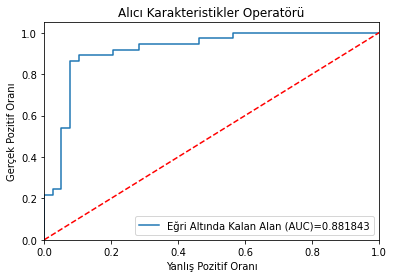

In [198]:
log_roc_auc = roc_auc_score(y_test,mlpc_tuned.predict(X_test))
fpr, tpr, threshols =roc_curve(y_test,mlpc_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label = 'Eğri Altında Kalan Alan (AUC)=%2f' % log_roc_auc)
plt.plot([0,1,0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('Gerçek Pozitif Oranı')
plt.xlabel('Yanlış Pozitif Oranı')
plt.title('Alıcı Karakteristikler Operatörü')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

* Bu kısımda farklı olarak hem roc eğrisini çizdirdim hemde auc değerini gösterimini sağladım.
* ROC eğrisi altında kalan alandır. AUC değerimiz 0.858'dır. Bu da  bir değerdir.AUC eğrimiz kötü bir sonuç vermemiştir.
* Kapsanan alanım ne kadar büyükse, makine öğrenme modelim de, verilen sınıfları ayırt etmede daha iyidir.
* Burada da 0.858 olarak görünüyor. Bu değer iyi bir değerdir.Çünkü 1 e ne kadar yakınsa AUC değerim o kadar iyi olacaktır.

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

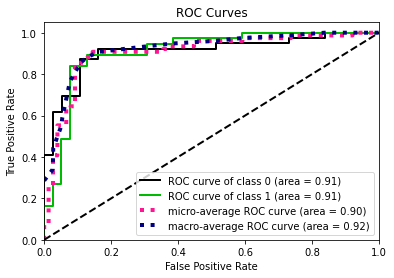

In [199]:
splt.plot_roc(y_test, predicted_proba)

Grafiğe baktığımızda 0.90 üzeri olan iki sınıfın (class = 0(mavi çizgi), class = 1(yeşil çizgi) doğruluk oranlarının yüksek ve birbirlerine paralel olarak ilerlemiş ama bazı yerlerde biri artarken diğeri sabit kalmış.
Sınıfların geçtiği eğrinin altında yer alan bölüm AUC bölgesi ve burada AUC yüksek yer kapladığından model başarısının yüksek olduğunu görebiliriz.
Aynı eğriyi yukarıdaki grafiktede çizdirdim. Farklı bir kod kullanımı için

Yukarıdaki toplada belirtilen doğruluk puanlarından en iyisi Rasgele Orman Kümeleri'dir. Alt kümelere ayırarak eğitip daha sonradan bu eğittiği alt kümeleri alarak ortalamasını alıyor. Bundan dolayı doğruluk oranı yüksek çıkmış olabilir.

Rasgele karar ağacı birden çok alt küme üreterek sınıflandırma işlemi esnasında sınıflandırma değerini yükseltmeyi hedefler. Burada da gördüğümüz gibi değeri diğer sınıflardan daha yüksektir.

Yaptığım araştırmaya göre genellikle, tıbbi bir durum olasılığını tahmin etmek için rasgele karar ağaç sınıflandırması kullanılmaktadır. Büyük ihtimalle daha önemli veriler üzerinde yani hastalık,kredi vb durumların sınıflandırılmasında doğru sonuca ulaşmak için tercih ediliyor. Çünkü bir hastanın hasta olup olmadığına karar veren bir makine öğrenmesi risk taşımaktadır, hasta olan bireye hasta değil diyebilir bunun için rasgele orman kümesi tercih edilebilir.Çünkü birden çok alt kümeye ayırıyor ve eğitiyor.


